In [229]:
from utils import show, getColor
from skimage import feature, morphology
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import numpy as np
from skimage import morphology
from skimage.morphology import medial_axis
from skimage.util import invert
from skimage.io import imread
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [246]:
imgName = 'map.png'
texturePath = '../../textures/map512/'
outputPath = './outputs/thickening/'

imgPath = os.path.join(texturePath, imgName)

image = imread(imgPath, as_gray=True)

height, width = image.shape
# imgSize = (250, 250)
imgSize = (width, height)
image = cv2.resize(image, imgSize)

if not os.path.exists(outputPath):
    os.makedirs(outputPath)

# Copy imgPath as input.png
inputPath = os.path.join(outputPath, 'input.png')
cv2.imwrite(inputPath, cv2.cvtColor(imread(imgPath), cv2.COLOR_BGR2RGB))


True

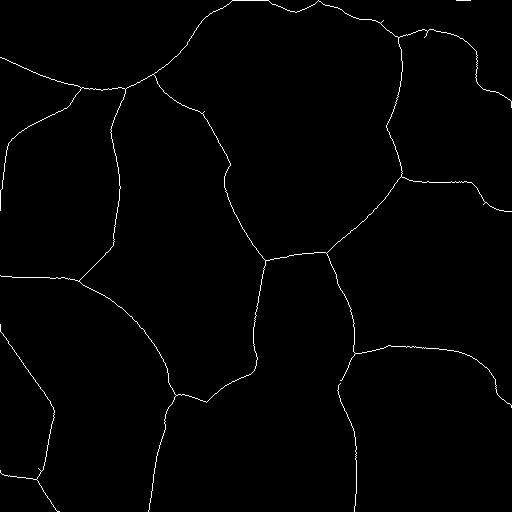

True

In [247]:
# Skeleton
sensitivity = 0.35
binary_image = image > sensitivity
binary_image = invert(binary_image)

skeleton, distance = medial_axis(binary_image, return_distance=True)
show(skeleton)
# Convert skeleton to a grayscale image
skele = invert(skeleton).astype(np.uint8) * 255
cv2.imwrite(os.path.join(outputPath, 'skeleton.png'), skele)

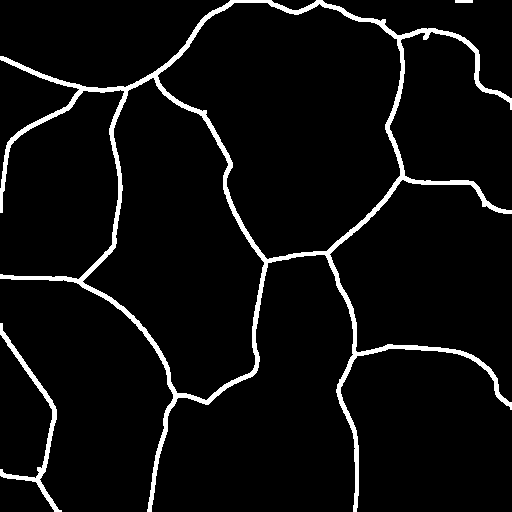

True

In [248]:
# DILATATION
# Binary image to grayscale image
skeleton_int = (skeleton * 255).astype(np.uint8)

# Kernel for dilation
kernel_size = 4
kernel = np.ones((kernel_size,kernel_size),np.uint8)

# Dilation
img_dilated = cv2.dilate(skeleton_int, kernel, iterations=1)

show(img_dilated)
cv2.imwrite(os.path.join(outputPath, 'dilated.png'), img_dilated)

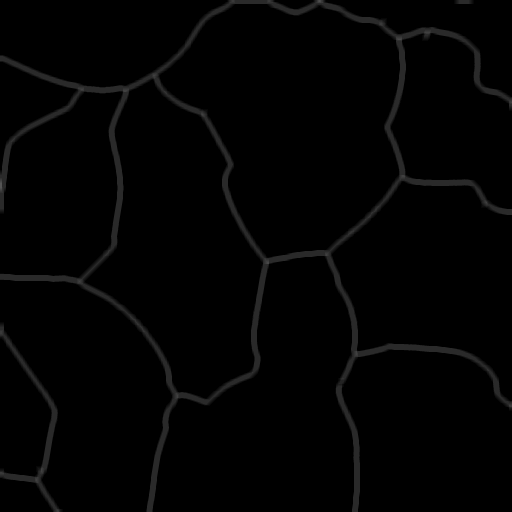

True

In [249]:
# DILATATION with other Kernel
skeleton_int = (skeleton * 255).astype(np.uint8)

kernel_size = 6
kernel = np.ones((kernel_size,kernel_size),np.float32) / (kernel_size**2)

img_blurred = cv2.filter2D(skeleton_int, -1, kernel)

show(img_blurred)
cv2.imwrite(os.path.join(outputPath, 'blurred.png'), img_blurred)


In [250]:
# Funny use of DILATATION to remove borders
m1 = imread(imgPath)
kernel_size = 5
kernel = np.ones((kernel_size,kernel_size),np.uint8)
m1_dil = cv2.dilate(m1, kernel, iterations=3)

# plt.imshow(m1_dil, cmap='gray')
# plt.show()

0
0
0
0


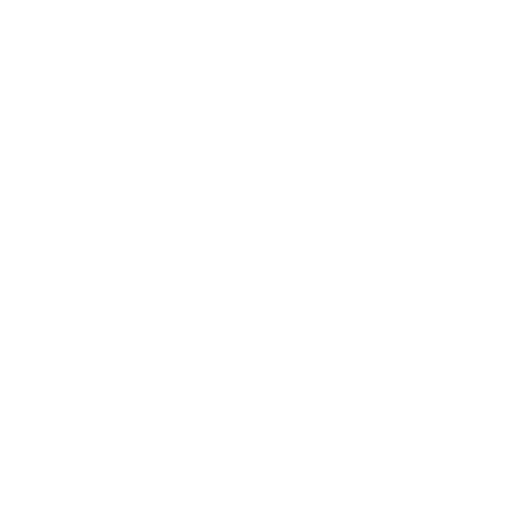

True

In [251]:
# DILATATION WITH ALPHA
def dilate(binary_image, alpha, kernel_size):
    img = (binary_image * alpha).astype(np.uint8)
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    return cv2.dilate(img, kernel, iterations=1)


def toRgba(img):
    color_channel = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    # color_channel only white pixels
    color_channel[color_channel > 0] = 255
    alpha_channel = img.copy()  # Use grayscale image as alpha channel
    alpha_channel = alpha_channel.astype(img.dtype)  # Ensure data type consistency
    print(alpha_channel[0,0])
    black_pixels_mask = cv2.inRange(img, 0, 20)
    alpha_channel[black_pixels_mask == 255] = 0
    res = cv2.merge((color_channel, alpha_channel))
    return res

def superpose(background, foreground):
    copied_image = background.copy()

    # Get the alpha channel of the target image
    target_alpha = foreground[:, :, 3] / 255.0

    # Replace the pixels in the copied image
    copied_image[target_alpha != 0] = foreground[target_alpha != 0]

    return copied_image

cv2.imwrite(os.path.join(outputPath, 'composition.png'), composition)
dilatation1 = toRgba(dilate(skeleton, 255,3))
dilatation2 = toRgba(dilate(skeleton, 153,4))
dilatation3 = toRgba(dilate(skeleton, 91,5))
dilatation4 = toRgba(dilate(skeleton, 55,6))
composition = superpose(dilatation4, superpose(dilatation3, superpose(dilatation2, dilatation1)))

# show(dilatation1)
# show(dilatation2)
# show(dilatation3)
show(composition)

cv2.imwrite(os.path.join(outputPath, 'composition.png'), composition)